# Implement a program that performs fuzzy c-means clustering on a set of data points and outputs the membership degrees for each data point in each cluster.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))
def initialize_clusters(X, K):
    return X[np.random.choice(X.shape[0], K, replace=False), :]
def update_membership_degrees(X, centers):
    m = X.shape[0]
    K = centers.shape[0]
    U = np.zeros((m, K))
    for i in range(m):
        x = X[i, :]
        d = [euclidean_distance(x, centers[j, :]) for j in range(K)]
        for j in range(K):
            U[i, j] = 1 / np.sum([d[j] / d[k] for k in range(K)])
    return U

In [3]:
def update_cluster_centers(X, U):
    m, n = X.shape
    K = U.shape[1]
    centers = np.zeros((K, n))
    for j in range(K):
        numerator = np.sum(U[:, j].reshape(-1, 1) * X, axis=0)
        denominator = np.sum(U[:, j])
        centers[j, :] = numerator / denominator
    return centers

In [4]:
def fuzzy_c_means(X, K, tol=1e-4, max_iter=100):
    centers = initialize_clusters(X, K)
    for i in range(max_iter):
        U = update_membership_degrees(X, centers)
        centers_prev = centers.copy()
        centers = update_cluster_centers(X, U)
        if np.allclose(centers, centers_prev, atol=tol):
            break
    return U

In [5]:
def plot_fuzzy_clusters(X, U):
    m, n = X.shape
    K = U.shape[1]
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    for k in range(K):
        xk = X[np.argmax(U, axis=1) == k, :]
        plt.scatter(xk[:, 0], xk[:, 1], s=30, c=colors[k % len(colors)])
    plt.show()

In [6]:
def main():
    np.random.seed(0)
    K = 3
    X = np.random.randn(100, 2)
    U = fuzzy_c_means(X, K)
    plot_fuzzy_clusters(X, U)

<ipython-input-2-60a22ce1d709>:13: RuntimeWarning: invalid value encountered in double_scalars
  U[i, j] = 1 / np.sum([d[j] / d[k] for k in range(K)])
<ipython-input-2-60a22ce1d709>:13: RuntimeWarning: divide by zero encountered in double_scalars
  U[i, j] = 1 / np.sum([d[j] / d[k] for k in range(K)])


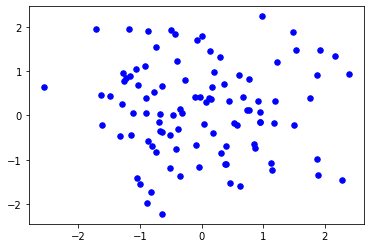

In [7]:
if __name__ == '__main__':
    main()